# TITANIC SURVIVAL PREDICTION
#### Aim :To Build a model that predicts whether a passenger on the Titanic survived or not
#### Author: Jaiminkumar

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

## Load The Data

In [2]:
df = pd.read_csv(r"F:\DATA SCIENCE 2023\CodSoft\Jaimin\TASK 1 - TITANIC\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning The Data

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Drop unnecessary columns 
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [6]:
# Handle missing age values 
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [8]:
# Encode string categorical columns as numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,0.0
1,1,1,1,38.0,1,0,71.2833,C85,1.0
2,1,3,1,26.0,0,0,7.9250,NaN,0.0
3,1,1,1,35.0,1,0,53.1000,C123,0.0
4,0,3,0,35.0,0,0,8.0500,NaN,0.0


In [10]:
# Impute missing embarked values
most_common_embark = df['Embarked'].value_counts().index[0]
# df['Embarked'] = df['Embarked'].fillna(most_common_embark)

In [11]:
most_common_embark

0.0

In [12]:
# Assuming 'df' is the name of your DataFrame
df.head()["Embarked"]

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

In [13]:
# Remove cabin number
df = df.drop(['Cabin'], axis=1)

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [15]:
print(df.isnull().sum()) 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [16]:
# Get most frequent value 
most_freq = df['Embarked'].value_counts().index[0]

In [17]:
print(df.isnull().sum()) 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [18]:
df['Embarked'] = df['Embarked'].fillna(most_freq)

In [19]:
# Save cleaned CSV file
df.to_csv('titanic_clean.csv', index=True)

In [20]:
print('Data cleaning completed!')

Data cleaning completed!


Drop unnecessary columns like PassengerId, Name, Ticket, Cabin

Handle missing Age values by filling with median age

Encode categorical columns as numbers (Sex, Embarked)

Impute most common value for missing Embarked

Convert Fare to numeric

Save cleaned CSV file

# Exploratory Data Analysis (EDA)

In [21]:
# Load in the cleaned CSV file
df = pd.read_csv('titanic_clean.csv')

In [22]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [23]:
# Printing the first 5 rows of the DataFrame
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [24]:
# Overview of data
print(df.shape) #shape of the DataFrame shwoing rows and columns
print(df.columns) #showing columns name present in DataFrame
print(df.head()) #showing first 5 rows of the DataFrame
print(df.isnull().sum()) #showing count of null values in the DataFrame's column

(891, 8)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       0.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       0.0
3         1       1    1  35.0      1      0  53.1000       0.0
4         0       3    0  35.0      0      0   8.0500       0.0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [25]:
# Univariate analysis  
print(df['Survived'].value_counts())
print(df['Pclass'].value_counts())
print(df['Sex'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
0    577
1    314
Name: count, dtype: int64


In [26]:
# Correlation matrix of the DataFrame
print(df.corr())

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.339898  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.081163  0.114631  0.245489   
Age      -0.064910 -0.339898 -0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081  0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096688  0.159651  0.216225   
Embarked  0.106811  0.045702  0.116569 -0.009165 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257307  0.106811  
Pclass   -0.549500  0.045702  
Sex       0.182333  0.116569  
Age       0.096688 -0.009165  
SibSp     0.159651 -0.059961  
Parch     0.216225 -0.078665  
Fare      1.000000  0.062142  
Embarked  0.062142  1.000000  


# Visualize the Data

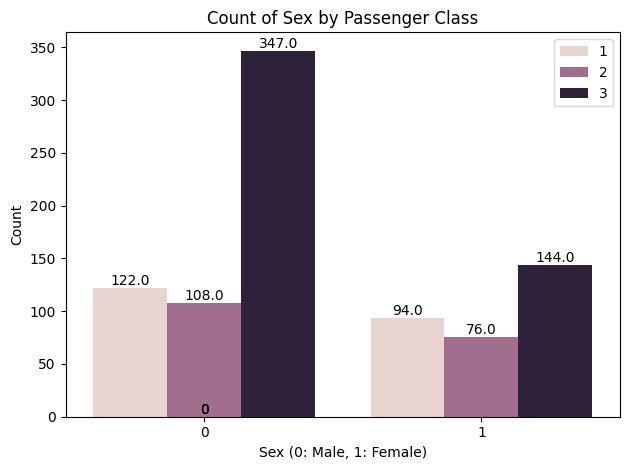

In [27]:
# Create countplot grouped by sex and passenger class
ax = sns.countplot(data=df, x='Sex', hue='Pclass')

# Annotate the count values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.legend(loc='upper right')
plt.title('Count of Sex by Passenger Class')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

#### There were significantly more male passengers than female passengers on the Titanic across all three passenger classes.

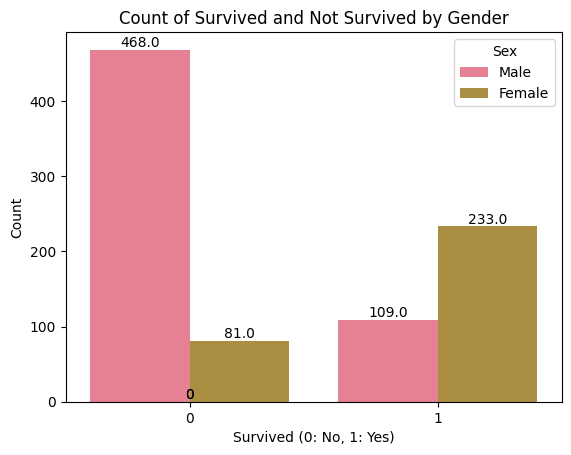

In [28]:
# Replace 0 with 'Male' and 1 with 'Female' in the 'Sex' column
df['Sex'] = df['Sex'].replace({0: 'Male', 1: 'Female'})

# Set a custom color palette for the plot
colors = sns.color_palette("husl")

# Creating the count plot with attractive colors
ax = sns.countplot(data=df, x='Survived', hue='Sex', palette=colors)

# Adding count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')

# Adding plot title and labels
plt.title('Count of Survived and Not Survived by Gender')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')

# Displaying the plot
plt.show()


### There were significantly more male passengers than female passengers on the Titanic across all three passenger classes.



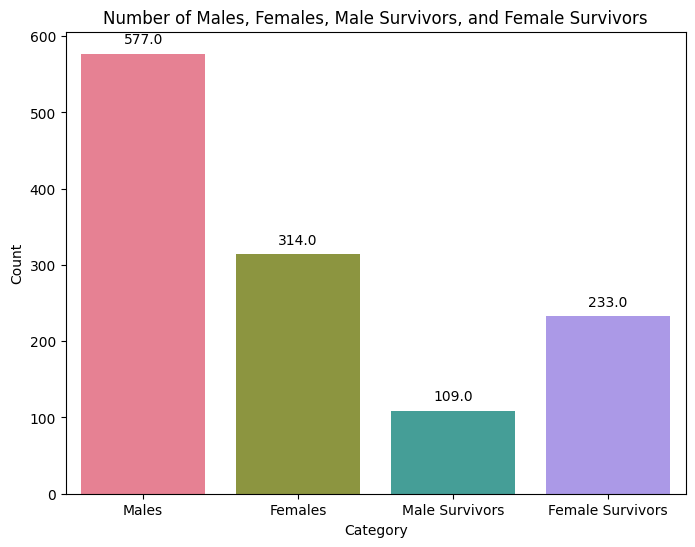

Number of males: 577
Number of females: 314
Number of male survivors: 109
Number of female survivors: 233


In [29]:
# Count the number of males and females
male_count = df[df['Sex'] == 'Male'].shape[0]
female_count = df[df['Sex'] == 'Female'].shape[0]

# Count the number of male survivors and female survivors
male_survivors = len(df[(df['Sex'] == 'Male') & (df['Survived'] == 1)])
female_survivors = len(df[(df['Sex'] == 'Female') & (df['Survived'] == 1)])

# Create a DataFrame for better data handling
counts_df = pd.DataFrame({
    'Category': ['Males', 'Females', 'Male Survivors', 'Female Survivors'],
    'Count': [male_count, female_count, male_survivors, female_survivors]
})

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', y='Count', data=counts_df, palette='husl')

# Adding count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

# Adding plot title and labels
plt.title('Number of Males, Females, Male Survivors, and Female Survivors')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()

# Print the results
print("Number of males:", male_count)
print("Number of females:", female_count)
print("Number of male survivors:", male_survivors)
print("Number of female survivors:", female_survivors)



## Conclusion:

### Even though there were more men, women were much more likely to survive the Titanic.

# Prepare the data for modeling

In [30]:
# Convert 'Sex' column to float
sex_mapping = {'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].map(sex_mapping).astype(float)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0
2,1,3,1.0,26.0,0,0,7.9250,0.0
3,1,1,1.0,35.0,1,0,53.1000,0.0
4,0,3,0.0,35.0,0,0,8.0500,0.0


### Split data into training and test sets

## Using Random Forest Classifier

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0
2,1,3,1.0,26.0,0,0,7.9250,0.0
3,1,1,1.0,35.0,1,0,53.1000,0.0
4,0,3,0.0,35.0,0,0,8.0500,0.0


In [35]:
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from sklearn.impute import SimpleImputer

# Impute missing numeric values with median  
imputer = SimpleImputer(strategy='median')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Model and predictions
model = RandomForestClassifier()  
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
preds = model.predict(X_test)

## Model Evaluation
## Using Accuracy Score

In [40]:
# Evaluate Accuracy
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.8268156424581006


In [41]:
from sklearn.metrics import accuracy_score, classification_report
# Classification Report
print("Random Forest Classifier Performance:")
print(classification_report(y_test, preds))
print()

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       108
           1       0.79      0.77      0.78        71

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179




#### Summary:

#### Our model achieved an accuracy of 82.6% on the test set. This indicates that the model is effectively learning to make correct predictions for most of the data.